#PACKAGES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#DATA ORIGINAL

##DATA

In [ ]:
df=pd.read_excel('Dataset Test.xlsx', sheet_name = 'Data8').set_index('nama_kabupaten_kota')
df

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan,luas_wilayah_km2
nama_kabupaten_kota,,,,,,,,
Kepulauan Seribu,68.76,0.2240,0.1031,0.096701,0.0273,0.000239,0.093896,10.18
Jakarta Selatan,74.12,0.3175,0.1368,0.163100,0.0568,0.000057,0.100274,154.32
Jakarta Timur,74.47,0.3326,0.1334,0.152697,0.0441,0.000043,0.112339,182.70
Jakarta Pusat,74.11,0.4122,0.1843,0.233388,0.0599,0.000069,0.173944,52.38
Jakarta Barat,73.62,0.3412,0.1255,0.164697,0.0401,0.000040,0.081657,124.44
...,...,...,...,...,...,...,...,...
Puncak,65.74,0.0973,0.0581,0.066067,0.0037,0.000000,0.066067,5014.26
Dogiyai,65.73,0.1462,0.0340,0.054971,0.0115,0.000010,0.049590,6137.04
Intan Jaya,65.60,0.0705,0.0601,0.059206,0.0353,0.000020,0.058626,9879.20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 514 entries, Kepulauan Seribu to Kota Jayapura
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   umur_harapan_hidup               514 non-null    float64
 1   persentase_keluhan_kesehatan     514 non-null    float64
 2   persentase_menderita_sakit       514 non-null    float64
 3   persentase_berobat_jalan         514 non-null    float64
 4   persentase_rawat_inap            514 non-null    float64
 5   fasilitas_kesehatan_per_kapita   514 non-null    float64
 6   persentase_jamkes_berobat_jalan  514 non-null    float64
 7   luas_wilayah_km2                 514 non-null    float64
dtypes: float64(8)
memory usage: 36.1+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

umur_harapan_hidup                 0
persentase_keluhan_kesehatan       0
persentase_menderita_sakit         0
persentase_berobat_jalan           0
persentase_rawat_inap              0
fasilitas_kesehatan_per_kapita     0
persentase_jamkes_berobat_jalan    0
luas_wilayah_km2                   0
dtype: int64

##DESKRIPTIF

In [ ]:
df.describe()

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan,luas_wilayah_km2
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,69.534047,0.284564,0.136509,0.127601,0.047800,0.000064,0.067839,3742.187121
std,3.468444,0.082796,0.042707,0.048926,0.018959,0.000054,0.040393,5521.653284
min,55.270000,0.002300,0.000600,0.000554,0.000000,0.000000,0.000554,10.180000
25%,67.217500,0.229225,0.103400,0.090263,0.035900,0.000029,0.038407,809.720000
50%,69.870000,0.286500,0.135099,0.126064,0.047100,0.000051,0.061105,1883.275000
75%,71.862500,0.337850,0.167725,0.159021,0.059850,0.000084,0.088100,4241.090000
max,77.650000,0.572500,0.273900,0.276433,0.109000,0.000392,0.221065,46430.540000


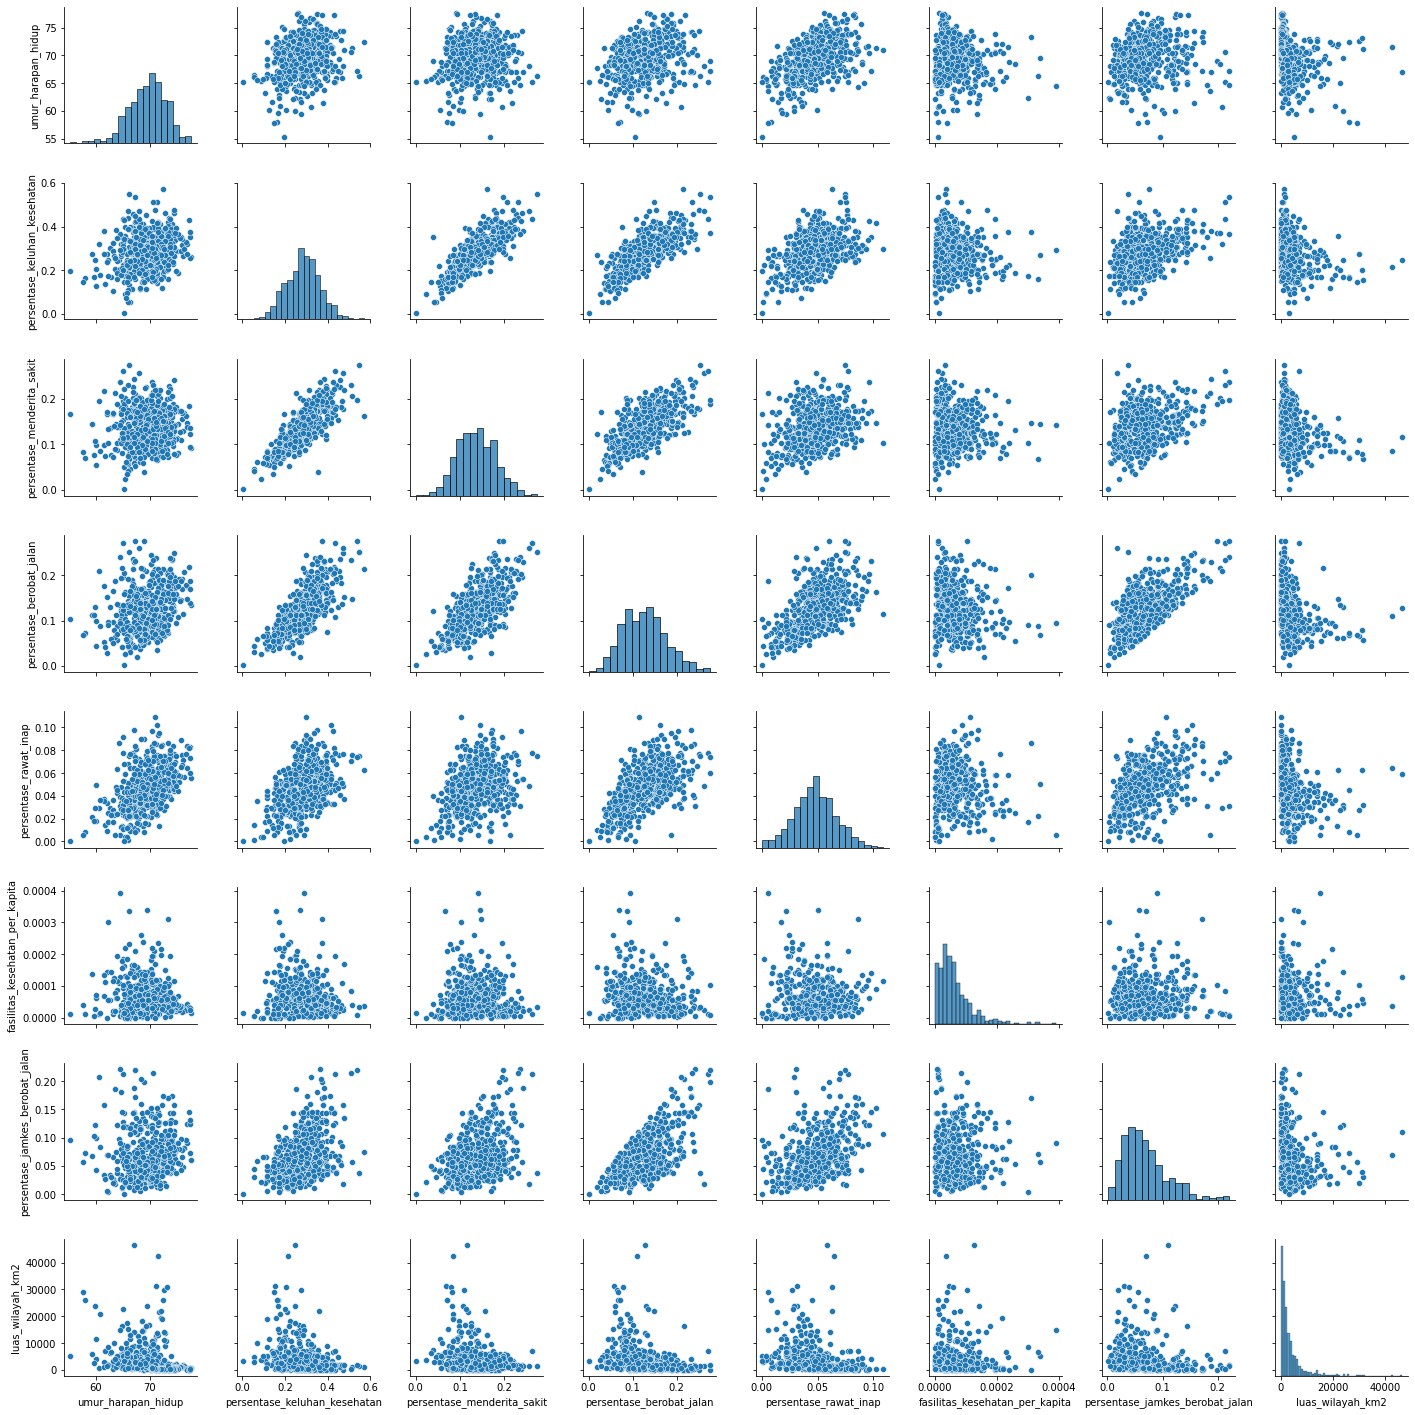

In [ ]:
sns.pairplot(df)

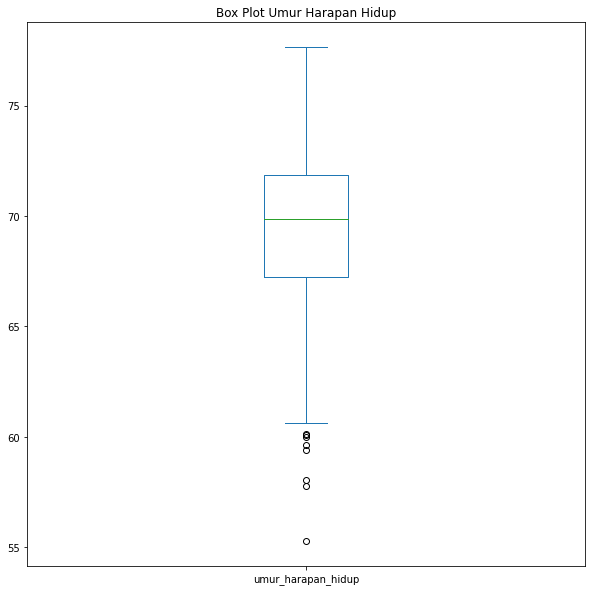

In [ ]:
df[['umur_harapan_hidup']].plot(figsize = (10,10), kind = 'box', title = 'Box Plot Umur Harapan Hidup')
plt.show()

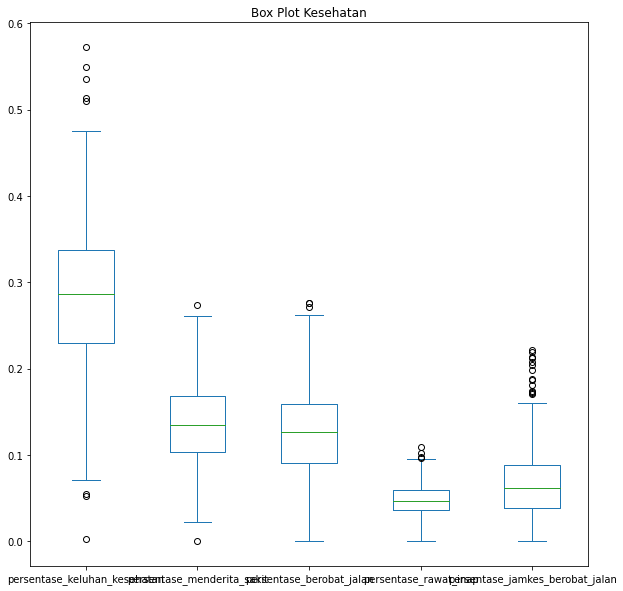

In [ ]:
df[['persentase_keluhan_kesehatan','persentase_menderita_sakit', 'persentase_berobat_jalan', 'persentase_rawat_inap','persentase_jamkes_berobat_jalan']].plot(figsize = (10,10), kind = 'box', title = 'Box Plot Kesehatan')
plt.show()

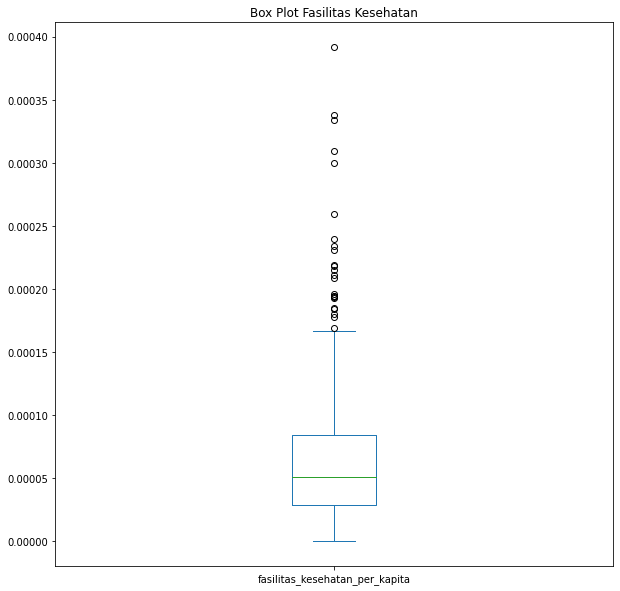

In [ ]:
df[['fasilitas_kesehatan_per_kapita']].plot(figsize = (10,10), kind = 'box', title = 'Box Plot Fasilitas Kesehatan')
plt.show()

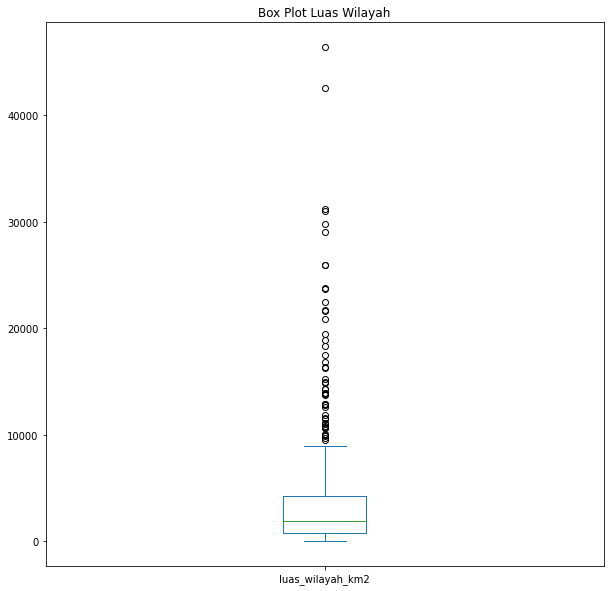

In [ ]:
df[['luas_wilayah_km2']].plot(figsize = (10,10), kind = 'box', title = 'Box Plot Luas Wilayah')
plt.show()

##Outliers Before Cleaning

In [ ]:
Q1 = df['umur_harapan_hidup'].quantile(0.25)
Q3 = df['umur_harapan_hidup'].quantile(0.75)
IQR = Q3 - Q1

dfouhh1 = df['umur_harapan_hidup'][((df['umur_harapan_hidup'] < (Q1 - 1.5 * IQR)) |(df['umur_harapan_hidup'] > (Q3 + 1.5 * IQR)))]

print("Kabupaten/Kota dengan Outlier Umur Harapan Hidup")
print(dfouhh1)
print("Total Umur Harapan Hidup Tidak Outlier", dfouhh1.shape)

Kabupaten/Kota dengan Outlier Umur Harapan Hidup
nama_kabupaten_kota
Seram Bagian Timur    59.41
Teluk Wondama         60.10
Tambrauw              60.13
Jayawijaya            59.64
Boven Digoel          59.97
Asmat                 58.05
Mamberamo Raya        57.77
Nduga                 55.27
Name: umur_harapan_hidup, dtype: float64
Total Umur Harapan Hidup Tidak Outlier (8,)


In [ ]:
Q1 = df['persentase_keluhan_kesehatan'].quantile(0.25)
Q3 = df['persentase_keluhan_kesehatan'].quantile(0.75)
IQR = Q3 - Q1

dfopkk1 = df['persentase_keluhan_kesehatan'][((df['persentase_keluhan_kesehatan'] < (Q1 - 1.5 * IQR)) |(df['persentase_keluhan_kesehatan'] > (Q3 + 1.5 * IQR)))]

print("Kabupaten/Kota dengan Outlier Keluhan Kesehatan")
print(dfopkk1)
print("Total Keluhan Kesehatan Tidak Outlier", dfopkk1.shape)

Kabupaten/Kota dengan Outlier Keluhan Kesehatan
nama_kabupaten_kota
KABUPATEN PANGANDARAN      0.5130
Kabupaten Jombang          0.5725
Kabupaten Lombok Tengah    0.5492
Sikka                      0.5359
Bantaeng                   0.5105
Paniai                     0.0543
Lanny Jaya                 0.0529
Deiyai                     0.0023
Name: persentase_keluhan_kesehatan, dtype: float64
Total Keluhan Kesehatan Tidak Outlier (8,)


In [ ]:
Q1 = df['persentase_menderita_sakit'].quantile(0.25)
Q3 = df['persentase_menderita_sakit'].quantile(0.75)
IQR = Q3 - Q1

dfopms1 = df['persentase_menderita_sakit'][((df['persentase_menderita_sakit'] < (Q1 - 1.5 * IQR)) |(df['persentase_menderita_sakit'] > (Q3 + 1.5 * IQR)))]

print("Kabupaten/Kota dengan Outlier Menderita Sakit")
print(dfopms1)
print("Total Menderita Sakit Tidak Outlier", dfopms1.shape)

Kabupaten/Kota dengan Outlier Menderita Sakit
nama_kabupaten_kota
Kabupaten Lombok Tengah    0.2739
Deiyai                     0.0006
Name: persentase_menderita_sakit, dtype: float64
Total Menderita Sakit Tidak Outlier (2,)


In [ ]:
Q1 = df['persentase_berobat_jalan'].quantile(0.25)
Q3 = df['persentase_berobat_jalan'].quantile(0.75)
IQR = Q3 - Q1

dfopbj1 = df['persentase_berobat_jalan'][((df['persentase_berobat_jalan'] < (Q1 - 1.5 * IQR)) |(df['persentase_berobat_jalan'] > (Q3 + 1.5 * IQR)))]

print("Kabupaten/Kota dengan Outlier Berobat Jalan")
print(dfopbj1)
print("Total Berobat Jalan Tidak Outlier", dfopbj1.shape)

Kabupaten/Kota dengan Outlier Berobat Jalan
nama_kabupaten_kota
Sibolga        0.276433
Sumba Timur    0.271467
Sikka          0.275828
Name: persentase_berobat_jalan, dtype: float64
Total Berobat Jalan Tidak Outlier (3,)


In [ ]:
Q1 = df['persentase_rawat_inap'].quantile(0.25)
Q3 = df['persentase_rawat_inap'].quantile(0.75)
IQR = Q3 - Q1

dfopri1 = df['persentase_rawat_inap'][((df['persentase_rawat_inap'] < (Q1 - 1.5 * IQR)) |(df['persentase_rawat_inap'] > (Q3 + 1.5 * IQR)))]

print("Kabupaten/Kota dengan Outlier Rawat Inap")
print(dfopri1)
print("Total Rawat Inap Tidak Outlier", dfopri1.shape)

Kabupaten/Kota dengan Outlier Rawat Inap
nama_kabupaten_kota
ACEH JAYA    0.0976
Kota Bima    0.0964
Pare Pare    0.1020
Palopo       0.1090
Name: persentase_rawat_inap, dtype: float64
Total Rawat Inap Tidak Outlier (4,)


In [ ]:
Q1 = df['persentase_jamkes_berobat_jalan'].quantile(0.25)
Q3 = df['persentase_jamkes_berobat_jalan'].quantile(0.75)
IQR = Q3 - Q1

dfopri1 = df['persentase_jamkes_berobat_jalan'][((df['persentase_jamkes_berobat_jalan'] < (Q1 - 1.5 * IQR)) |(df['persentase_jamkes_berobat_jalan'] > (Q3 + 1.5 * IQR)))]

print("Kabupaten/Kota dengan Outlier JamKes Berobat Jalan")
print(dfopri1)
print("Total JamKes Berobat Jalan Tidak Outlier", dfopri1.shape)

Kabupaten/Kota dengan Outlier JamKes Berobat Jalan
nama_kabupaten_kota
Jakarta Pusat       0.173944
Kota Mojokerto      0.170840
Sibolga             0.198645
Sumba Timur         0.212722
Kupang              0.180486
Lembata             0.187933
Sikka               0.219614
Rote Ndao           0.221065
Sumba Tengah        0.204323
Sabu Raijua         0.207258
Kota Gorontalo      0.172949
Bantaeng            0.213653
Takalar             0.172233
Mamberamo Tengah    0.186774
Name: persentase_jamkes_berobat_jalan, dtype: float64
Total JamKes Berobat Jalan Tidak Outlier (14,)


In [ ]:
Q1 = df['fasilitas_kesehatan_per_kapita'].quantile(0.25)
Q3 = df['fasilitas_kesehatan_per_kapita'].quantile(0.75)
IQR = Q3 - Q1

dfojfk1 = df['fasilitas_kesehatan_per_kapita'][((df['fasilitas_kesehatan_per_kapita'] < (Q1 - 1.5 * IQR)) |(df['fasilitas_kesehatan_per_kapita'] > (Q3 + 1.5 * IQR)))]

print("Kabupaten/Kota dengan Outlier Fasilitas Kesehatan")
print(dfojfk1)
print("Total Fasilitas Kesehatan Tidak Outlier", dfojfk1.shape)

Kabupaten/Kota dengan Outlier Fasilitas Kesehatan
nama_kabupaten_kota
Kepulauan Seribu      0.000239
Kota Blitar           0.000194
Kota Mojokerto        0.000310
SABANG                0.000194
Natuna                0.000184
Kepulauan Anambas     0.000211
Kota Sungai Penuh     0.000196
Mahakam Ulu           0.000215
Tana Tidung           0.000234
Kepulauan Talaud      0.000180
Kepulauan Sitaro      0.000209
Wakatobi              0.000218
Buton Utara           0.000169
Konawe Utara          0.000338
Konawe Kepulauan      0.000260
Muna Barat            0.000193
Maluku Barat Daya     0.000300
Tual                  0.000219
Halmahera Tengah      0.000193
Kaimana               0.000178
Sorong Selatan        0.000334
Sorong                0.000230
Pegunungan Bintang    0.000392
Tolikara              0.000185
Name: fasilitas_kesehatan_per_kapita, dtype: float64
Total Fasilitas Kesehatan Tidak Outlier (24,)


In [ ]:
Q1 = df['luas_wilayah_km2'].quantile(0.25)
Q3 = df['luas_wilayah_km2'].quantile(0.75)
IQR = Q3 - Q1

dfojfk1 = df['luas_wilayah_km2'][((df['luas_wilayah_km2'] < (Q1 - 1.5 * IQR)) |(df['luas_wilayah_km2'] > (Q3 + 1.5 * IQR)))]

print("Kabupaten/Kota dengan Outlier Fasilitas Kesehatan")
print(dfojfk1)
print("Total Fasilitas Kesehatan Tidak Outlier", dfojfk1.shape)

Kabupaten/Kota dengan Outlier Fasilitas Kesehatan
nama_kabupaten_kota
Indragiri Hilir                               12614.78
Pelalawan                                     12758.45
Kampar                                        10983.47
Ogan Komering Ilir                            18359.04
Musi Banyuasin                                14266.26
Banyuasin                                     11832.99
Sanggau                                       12857.80
Ketapang                                      31240.74
Sintang                                       21638.20
Kapuas Hulu                                   29842.00
Melawi                                        10640.80
Kotawaringin Barat                            10759.00
Kotawaringin Timur                            16796.00
Kapuas                                        14999.00
Seruyan                                       16404.00
Katingan                                      17500.00
Gunung Mas                                    1080

##Independent vs Dependent Graph Before Cleaning

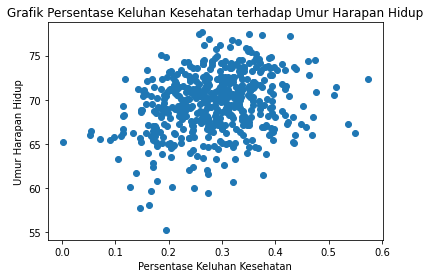

In [ ]:
# x axis values
x = df['persentase_keluhan_kesehatan']
# corresponding y axis values
y = df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Keluhan Kesehatan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Keluhan Kesehatan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

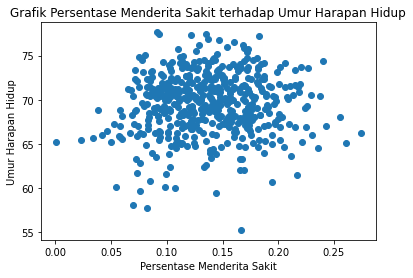

In [ ]:
# x axis values
x = df['persentase_menderita_sakit']
# corresponding y axis values
y = df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Menderita Sakit')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Menderita Sakit terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

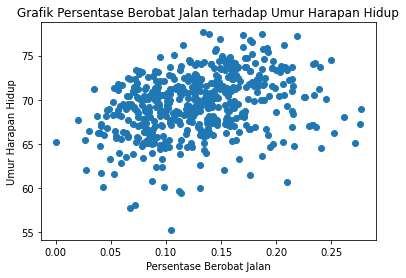

In [ ]:
# x axis values
x = df['persentase_berobat_jalan']
# corresponding y axis values
y = df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Berobat Jalan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Berobat Jalan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

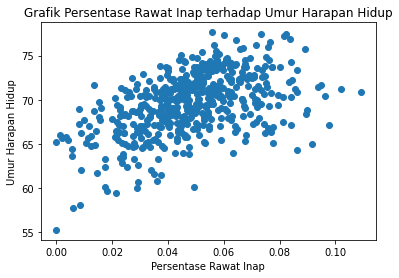

In [ ]:
# x axis values
x = df['persentase_rawat_inap']
# corresponding y axis values
y = df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Rawat Inap')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Rawat Inap terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

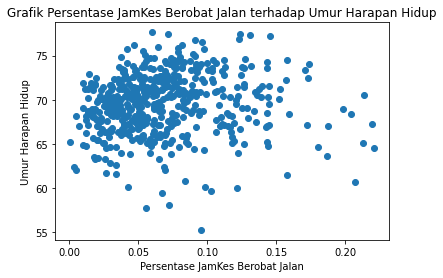

In [ ]:
# x axis values
x = df['persentase_jamkes_berobat_jalan']
# corresponding y axis values
y = df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase JamKes Berobat Jalan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase JamKes Berobat Jalan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

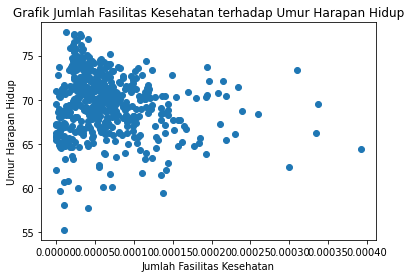

In [ ]:
# x axis values
x = df['fasilitas_kesehatan_per_kapita']
# corresponding y axis values
y = df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Jumlah Fasilitas Kesehatan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Jumlah Fasilitas Kesehatan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

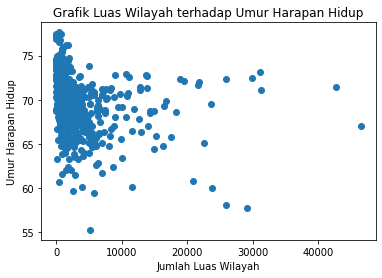

In [ ]:
# x axis values
x = df['luas_wilayah_km2']
# corresponding y axis values
y = df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Jumlah Luas Wilayah')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Luas Wilayah terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

##QQ Plot Before Cleaning

In [ ]:
import pylab as py

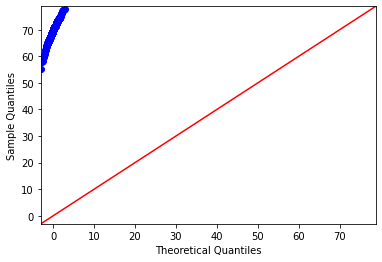

In [ ]:
sm.qqplot(df['umur_harapan_hidup'], line ='45')
py.show()

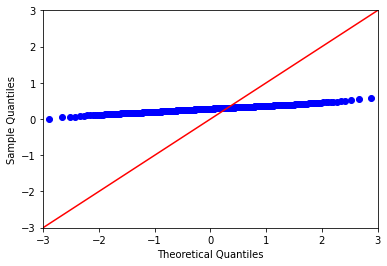

In [ ]:
sm.qqplot(df['persentase_keluhan_kesehatan'], line ='45')
py.show()

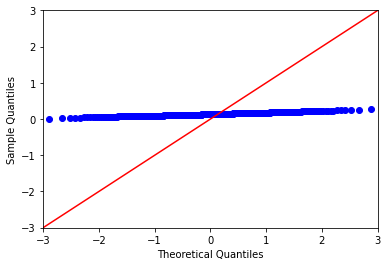

In [ ]:
sm.qqplot(df['persentase_menderita_sakit'], line ='45')
py.show()

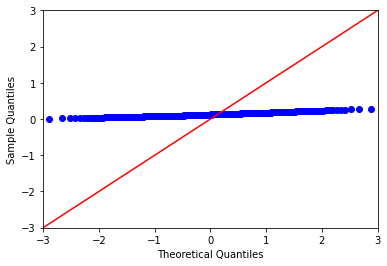

In [ ]:
sm.qqplot(df['persentase_berobat_jalan'], line ='45')
py.show()

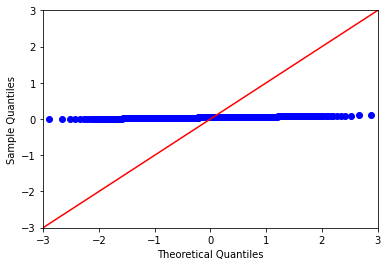

In [ ]:
sm.qqplot(df['persentase_rawat_inap'], line ='45')
py.show()

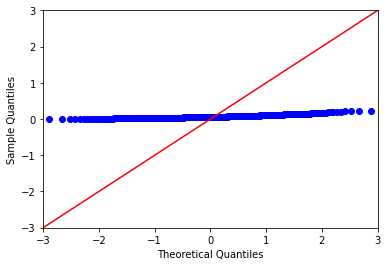

In [ ]:
sm.qqplot(df['persentase_jamkes_berobat_jalan'], line ='45')
py.show()

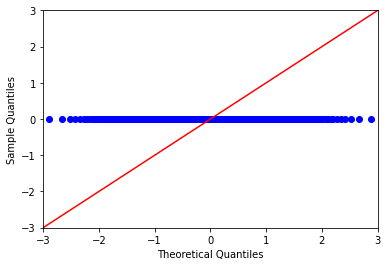

In [ ]:
sm.qqplot(df['fasilitas_kesehatan_per_kapita'], line ='45')
py.show()

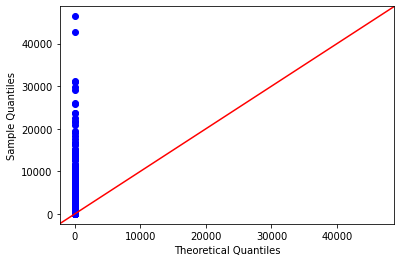

In [ ]:
sm.qqplot(df['luas_wilayah_km2'], line ='45')
py.show()

##CLEANING

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print("Kabupaten/Kota yang Memiliki Nilai Outlier:")
print(df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)])
print('\n')
df = df[~((df< (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
print("Kabupaten/Kota Shape Setelah Membuang Ouliers:", df.shape)

Kabupaten/Kota yang Memiliki Nilai Outlier:
                       umur_harapan_hidup  persentase_keluhan_kesehatan  \
nama_kabupaten_kota                                                       
Kepulauan Seribu                    68.76                        0.2240   
Jakarta Pusat                       74.11                        0.4122   
KABUPATEN PANGANDARAN               71.40                        0.5130   
Kabupaten Jombang                   72.40                        0.5725   
Kota Blitar                         73.75                        0.4343   
...                                   ...                           ...   
Nduga                               55.27                        0.1958   
Lanny Jaya                          66.06                        0.0529   
Mamberamo Tengah                    63.59                        0.2537   
Intan Jaya                          65.60                        0.0705   
Deiyai                              65.24               

##Independent vs Dependent Graph After Cleaning

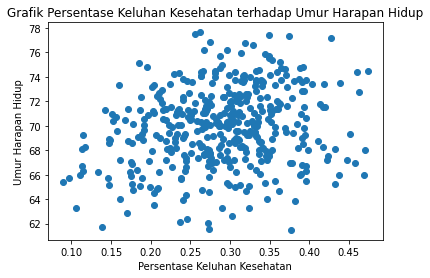

In [ ]:
# x axis values
x = df['persentase_keluhan_kesehatan']
# corresponding y axis values
y = df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Keluhan Kesehatan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Keluhan Kesehatan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

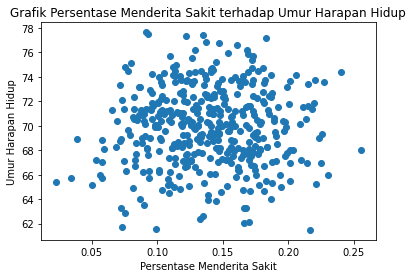

In [ ]:
# x axis values
x = df['persentase_menderita_sakit']
# corresponding y axis values
y = df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Menderita Sakit')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Menderita Sakit terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

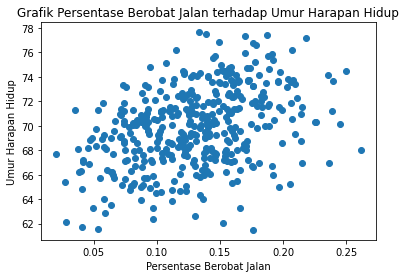

In [ ]:
# x axis values
x = df['persentase_berobat_jalan']
# corresponding y axis values
y = df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Berobat Jalan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Berobat Jalan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

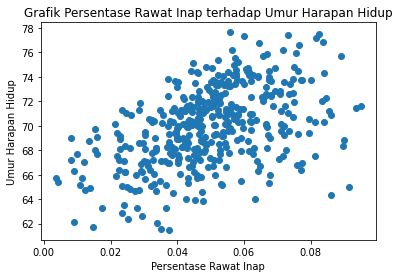

In [ ]:
# x axis values
x = df['persentase_rawat_inap']
# corresponding y axis values
y = df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Rawat Inap')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Rawat Inap terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

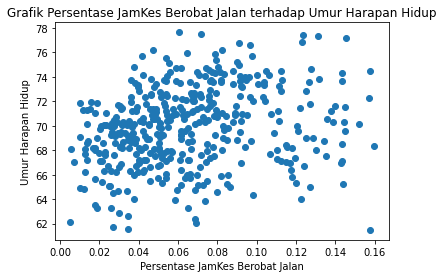

In [ ]:
# x axis values
x = df['persentase_jamkes_berobat_jalan']
# corresponding y axis values
y = df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase JamKes Berobat Jalan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase JamKes Berobat Jalan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

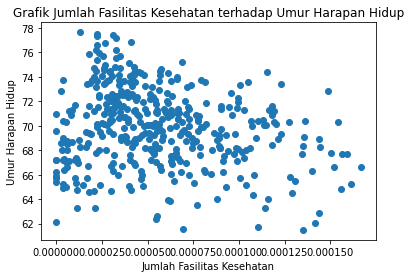

In [ ]:
# x axis values
x = df['fasilitas_kesehatan_per_kapita']
# corresponding y axis values
y = df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Jumlah Fasilitas Kesehatan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Jumlah Fasilitas Kesehatan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

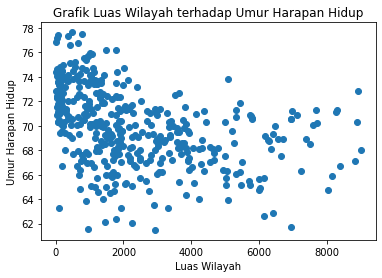

In [ ]:
# x axis values
x = df['luas_wilayah_km2']
# corresponding y axis values
y = df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Luas Wilayah')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Luas Wilayah terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

##QQ Plot After Cleaning

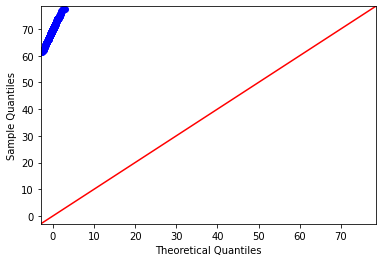

In [ ]:
sm.qqplot(df['umur_harapan_hidup'], line ='45')
py.show()

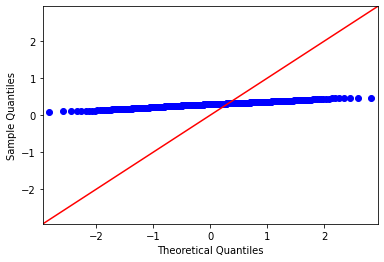

In [ ]:
sm.qqplot(df['persentase_keluhan_kesehatan'], line ='45')
py.show()

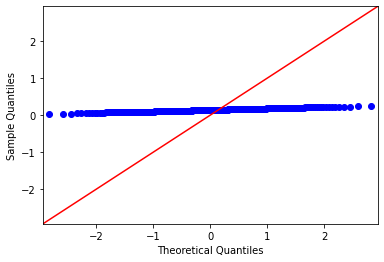

In [ ]:
sm.qqplot(df['persentase_menderita_sakit'], line ='45')
py.show()

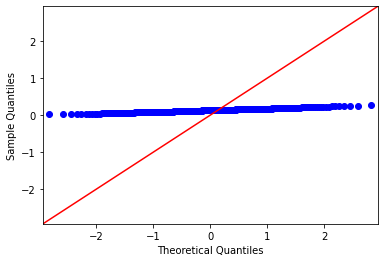

In [ ]:
sm.qqplot(df['persentase_berobat_jalan'], line ='45')
py.show()

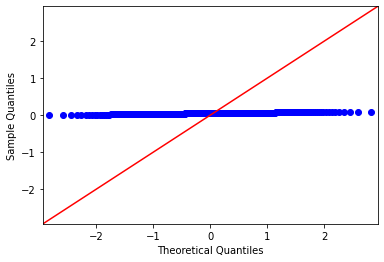

In [ ]:
sm.qqplot(df['persentase_rawat_inap'], line ='45')
py.show()

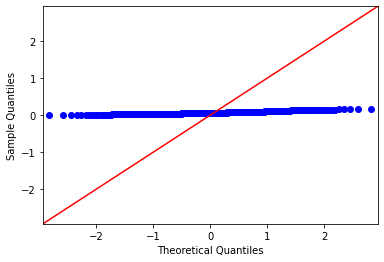

In [ ]:
sm.qqplot(df['persentase_jamkes_berobat_jalan'], line ='45')
py.show()

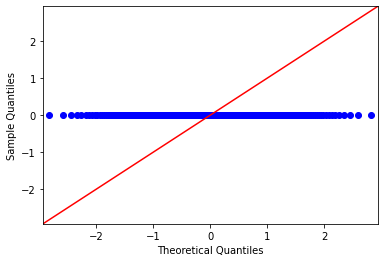

In [ ]:
sm.qqplot(df['fasilitas_kesehatan_per_kapita'], line ='45')
py.show()

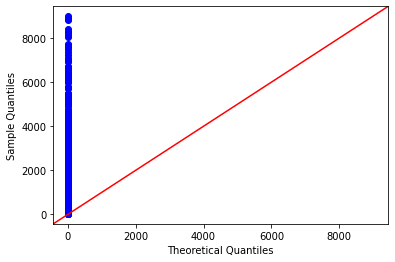

In [ ]:
sm.qqplot(df['luas_wilayah_km2'], line ='45')
py.show()

##UJI ASUMSI KLASIK

In [ ]:
#Normality test

from scipy.stats import shapiro

stat, p = shapiro(df['umur_harapan_hidup'])
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

#Untuk data <100 atau <50

stat=0.996, p=0.315

Berdistribusi Normal


In [ ]:
#Normality test

from scipy.stats import normaltest

stat, p = normaltest(df['umur_harapan_hidup'])
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

#D’Agostino’s K-squared
#Berdasarkan Skewness dan Kurtosis

stat=2.410, p=0.300

Berdistribusi Normal


In [ ]:
#Normality test

from scipy.stats import anderson

result = anderson(df['umur_harapan_hidup'])
print ('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
  sig_lev, crit_val = result.significance_level[i], result.critical_values[i]
  if result.statistic < crit_val:
    print (f'Berdistribusi Normal : {crit_val} critical value at {sig_lev} level of significance')
  else:
    print (f'Tidak berdistribusi Normal : {crit_val} critical value at {sig_lev} level of significance')

#Tidak bisa membedakan normal/exponential

stat=0.285
Berdistribusi Normal : 0.571 critical value at 15.0 level of significance
Berdistribusi Normal : 0.65 critical value at 10.0 level of significance
Berdistribusi Normal : 0.78 critical value at 5.0 level of significance
Berdistribusi Normal : 0.909 critical value at 2.5 level of significance
Berdistribusi Normal : 1.082 critical value at 1.0 level of significance


In [ ]:
#Normality test

from scipy.stats import chisquare

stat, p = chisquare(df['umur_harapan_hidup'])
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

#Untuk variabel categorical

stat=61.097, p=1.000

Berdistribusi Normal


In [ ]:
#Normality test

from statsmodels.stats.diagnostic import lilliefors

stat, p = lilliefors(df['umur_harapan_hidup'])
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

#Untuk cek normality sample

stat=0.031, p=0.200

Berdistribusi Normal


In [ ]:
#Normality test

from scipy.stats import jarque_bera

stat, p = jarque_bera(df['umur_harapan_hidup'])
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

#Untuk variabel >1000

stat=2.180, p=0.336

Berdistribusi Normal


In [ ]:
#Normality test

from scipy.stats import kstest

stat, p = kstest(df['umur_harapan_hidup'],'norm')
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

#Paling cocok untuk regression, bisa untuk >100

stat=1.000, p=0.000

Tidak berdistribusi Normal


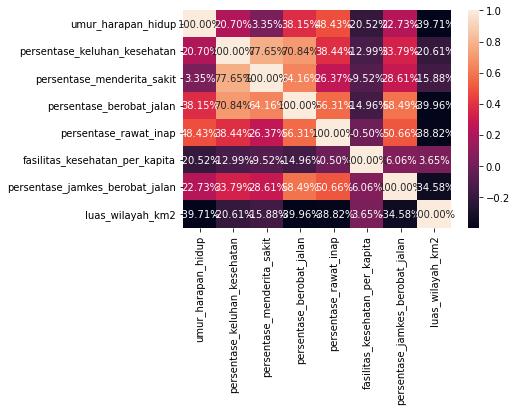

In [ ]:
#Linearity test
corr = df.corr()
hmcorr = sns.heatmap(corr, annot=True, fmt='.2%')
hmcorr
plt.show()

In [ ]:
#Multicollinearity test
features = ['persentase_keluhan_kesehatan','persentase_menderita_sakit','persentase_berobat_jalan','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita','luas_wilayah_km2']

X = df[features]
from statsmodels.stats.outliers_influence import variance_inflation_factor

model_variables = X.columns
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = pd.DataFrame({'Variable': model_variables, 'VIF': vif_values})
vif
vif.sort_values('VIF', ascending=False).reset_index(drop=True)

,Variable,VIF
0,persentase_keluhan_kesehatan,47.290289
1,persentase_menderita_sakit,34.880494
2,persentase_berobat_jalan,31.996144
3,persentase_rawat_inap,13.351870
4,persentase_jamkes_berobat_jalan,7.784684
5,fasilitas_kesehatan_per_kapita,3.063179
6,luas_wilayah_km2,2.235460


In [ ]:
#Multicollinearity test 2
features = ['persentase_menderita_sakit','persentase_berobat_jalan','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita','luas_wilayah_km2']

X = df[features]
from statsmodels.stats.outliers_influence import variance_inflation_factor

model_variables = X.columns
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = pd.DataFrame({'Variable': model_variables, 'VIF': vif_values})
vif
vif.sort_values('VIF', ascending=False).reset_index(drop=True)

,Variable,VIF
0,persentase_berobat_jalan,27.959455
1,persentase_menderita_sakit,19.680461
2,persentase_rawat_inap,12.632157
3,persentase_jamkes_berobat_jalan,7.749591
4,fasilitas_kesehatan_per_kapita,3.052412
5,luas_wilayah_km2,2.128965


In [ ]:
#Multicollinearity test 3
features = ['persentase_menderita_sakit','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita','luas_wilayah_km2']

X = df[features]
from statsmodels.stats.outliers_influence import variance_inflation_factor

model_variables = X.columns
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = pd.DataFrame({'Variable': model_variables, 'VIF': vif_values})
vif
vif.sort_values('VIF', ascending=False).reset_index(drop=True)

,Variable,VIF
0,persentase_rawat_inap,10.468778
1,persentase_menderita_sakit,9.685852
2,persentase_jamkes_berobat_jalan,6.544270
3,fasilitas_kesehatan_per_kapita,2.962808
4,luas_wilayah_km2,2.074499


In [ ]:
#Multicollinearity test 3
features = ['persentase_menderita_sakit','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita','luas_wilayah_km2']

X = df[features]
from statsmodels.stats.outliers_influence import variance_inflation_factor

model_variables = X.columns
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = pd.DataFrame({'Variable': model_variables, 'VIF': vif_values})
vif
vif.sort_values('VIF', ascending=False).reset_index(drop=True)

,Variable,VIF
0,persentase_menderita_sakit,6.663388
1,persentase_jamkes_berobat_jalan,5.048060
2,fasilitas_kesehatan_per_kapita,2.880550
3,luas_wilayah_km2,2.071904


In [ ]:
#define response variable
y = df['umur_harapan_hidup']

#define predictor variables
x = df[['persentase_menderita_sakit','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita','luas_wilayah_km2']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Heteroscedasticity test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

AssertionError: ignored

##ANALISIS REGRESI

In [ ]:
X = sm.add_constant(df[['persentase_menderita_sakit','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita','luas_wilayah_km2']].to_numpy())
y = df['umur_harapan_hidup'].to_numpy()
LR = sm.OLS(y, X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     27.89
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           1.63e-20
Time:                        15:50:56   Log-Likelihood:                -1028.9
No. Observations:                 418   AIC:                             2068.
Df Residuals:                     413   BIC:                             2088.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.2330      0.639    113.058      0.0

In [ ]:
X = sm.add_constant(df[['persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita','luas_wilayah_km2']].to_numpy())
y = df['umur_harapan_hidup'].to_numpy()
LR = sm.OLS(y, X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     35.90
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           1.22e-20
Time:                        15:51:01   Log-Likelihood:                -1030.5
No. Observations:                 418   AIC:                             2069.
Df Residuals:                     414   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.3859      0.435    164.150      0.0

#DATA NORMALIZED

##DATA

In [ ]:
df=pd.read_excel('Dataset Test.xlsx', sheet_name = 'Data8').set_index('nama_kabupaten_kota')
df

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan,luas_wilayah_km2
nama_kabupaten_kota,,,,,,,,
Kepulauan Seribu,68.76,0.2240,0.1031,0.096701,0.0273,0.000239,0.093896,10.18
Jakarta Selatan,74.12,0.3175,0.1368,0.163100,0.0568,0.000057,0.100274,154.32
Jakarta Timur,74.47,0.3326,0.1334,0.152697,0.0441,0.000043,0.112339,182.70
Jakarta Pusat,74.11,0.4122,0.1843,0.233388,0.0599,0.000069,0.173944,52.38
Jakarta Barat,73.62,0.3412,0.1255,0.164697,0.0401,0.000040,0.081657,124.44
...,...,...,...,...,...,...,...,...
Puncak,65.74,0.0973,0.0581,0.066067,0.0037,0.000000,0.066067,5014.26
Dogiyai,65.73,0.1462,0.0340,0.054971,0.0115,0.000010,0.049590,6137.04
Intan Jaya,65.60,0.0705,0.0601,0.059206,0.0353,0.000020,0.058626,9879.20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 514 entries, Kepulauan Seribu to Kota Jayapura
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   umur_harapan_hidup               514 non-null    float64
 1   persentase_keluhan_kesehatan     514 non-null    float64
 2   persentase_menderita_sakit       514 non-null    float64
 3   persentase_berobat_jalan         514 non-null    float64
 4   persentase_rawat_inap            514 non-null    float64
 5   fasilitas_kesehatan_per_kapita   514 non-null    float64
 6   persentase_jamkes_berobat_jalan  514 non-null    float64
 7   luas_wilayah_km2                 514 non-null    float64
dtypes: float64(8)
memory usage: 36.1+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

umur_harapan_hidup                 0
persentase_keluhan_kesehatan       0
persentase_menderita_sakit         0
persentase_berobat_jalan           0
persentase_rawat_inap              0
fasilitas_kesehatan_per_kapita     0
persentase_jamkes_berobat_jalan    0
luas_wilayah_km2                   0
dtype: int64

##CLEANING & SCALING

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print("Kabupaten/Kota yang Memiliki Nilai Outlier:")
print(df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)])
print('\n')
df = df[~((df< (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
print("Kabupaten/Kota Shape Setelah Membuang Ouliers:", df.shape)

Kabupaten/Kota yang Memiliki Nilai Outlier:
                       umur_harapan_hidup  persentase_keluhan_kesehatan  \
nama_kabupaten_kota                                                       
Kepulauan Seribu                    68.76                        0.2240   
Jakarta Pusat                       74.11                        0.4122   
KABUPATEN PANGANDARAN               71.40                        0.5130   
Kabupaten Jombang                   72.40                        0.5725   
Kota Blitar                         73.75                        0.4343   
...                                   ...                           ...   
Nduga                               55.27                        0.1958   
Lanny Jaya                          66.06                        0.0529   
Mamberamo Tengah                    63.59                        0.2537   
Intan Jaya                          65.60                        0.0705   
Deiyai                              65.24               

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, Jakarta Selatan to Kota Jayapura
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   umur_harapan_hidup               418 non-null    float64
 1   persentase_keluhan_kesehatan     418 non-null    float64
 2   persentase_menderita_sakit       418 non-null    float64
 3   persentase_berobat_jalan         418 non-null    float64
 4   persentase_rawat_inap            418 non-null    float64
 5   fasilitas_kesehatan_per_kapita   418 non-null    float64
 6   persentase_jamkes_berobat_jalan  418 non-null    float64
 7   luas_wilayah_km2                 418 non-null    float64
dtypes: float64(8)
memory usage: 29.4+ KB


In [ ]:
df.describe()

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan,luas_wilayah_km2
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,69.905048,0.289647,0.138413,0.129385,0.049302,0.000055,0.064582,2311.856507
std,3.200335,0.074440,0.039927,0.045055,0.017357,0.000037,0.034473,2084.047544
min,61.480000,0.089600,0.022800,0.020254,0.003700,0.000000,0.004931,16.060000
25%,67.690000,0.240625,0.109650,0.094898,0.038975,0.000029,0.038335,728.607500
50%,70.060000,0.296000,0.138550,0.129732,0.048600,0.000048,0.059830,1728.260000
75%,72.097500,0.338425,0.168875,0.159362,0.060525,0.000075,0.083286,3368.430000
max,77.650000,0.473600,0.255200,0.261457,0.095000,0.000167,0.159702,8997.000000


In [ ]:
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=names)

In [ ]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   umur_harapan_hidup               418 non-null    float64
 1   persentase_keluhan_kesehatan     418 non-null    float64
 2   persentase_menderita_sakit       418 non-null    float64
 3   persentase_berobat_jalan         418 non-null    float64
 4   persentase_rawat_inap            418 non-null    float64
 5   fasilitas_kesehatan_per_kapita   418 non-null    float64
 6   persentase_jamkes_berobat_jalan  418 non-null    float64
 7   luas_wilayah_km2                 418 non-null    float64
dtypes: float64(8)
memory usage: 26.2 KB


In [ ]:
scaled_df.describe()

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan,luas_wilayah_km2
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.521030,0.520955,0.497473,0.452445,0.499476,0.330075,0.385414,0.255630
std,0.197918,0.193855,0.171802,0.186792,0.190109,0.220664,0.222734,0.232052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.384045,0.393294,0.373709,0.309467,0.386364,0.172710,0.215828,0.079340
50%,0.530612,0.537500,0.498064,0.453883,0.491785,0.288986,0.354708,0.190648
75%,0.656617,0.647982,0.628550,0.576725,0.622399,0.447676,0.506267,0.373276
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Independent vs Dependent Graph After Scaling

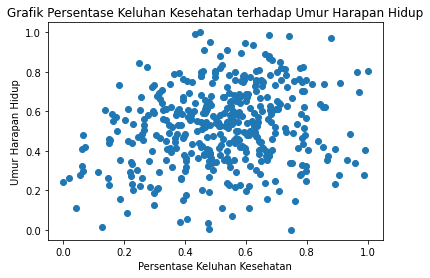

In [ ]:
# x axis values
x = scaled_df['persentase_keluhan_kesehatan']
# corresponding y axis values
y = scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Keluhan Kesehatan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Keluhan Kesehatan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

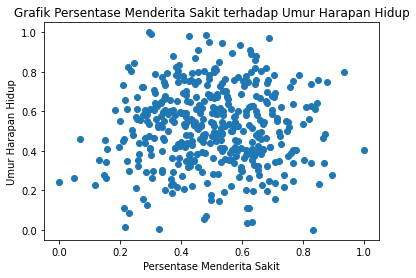

In [ ]:
# x axis values
x = scaled_df['persentase_menderita_sakit']
# corresponding y axis values
y = scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Menderita Sakit')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Menderita Sakit terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

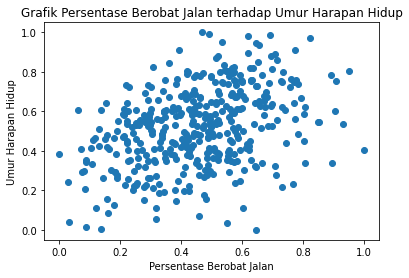

In [ ]:
# x axis values
x = scaled_df['persentase_berobat_jalan']
# corresponding y axis values
y = scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Berobat Jalan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Berobat Jalan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

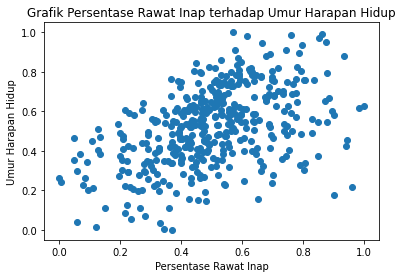

In [ ]:
# x axis values
x = scaled_df['persentase_rawat_inap']
# corresponding y axis values
y = scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Rawat Inap')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Rawat Inap terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

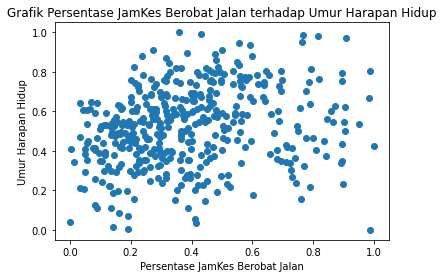

In [ ]:
# x axis values
x = scaled_df['persentase_jamkes_berobat_jalan']
# corresponding y axis values
y = scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase JamKes Berobat Jalan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase JamKes Berobat Jalan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

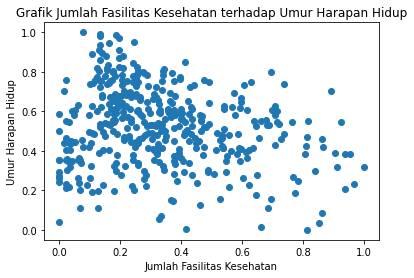

In [ ]:
# x axis values
x = scaled_df['fasilitas_kesehatan_per_kapita']
# corresponding y axis values
y = scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Jumlah Fasilitas Kesehatan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Jumlah Fasilitas Kesehatan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

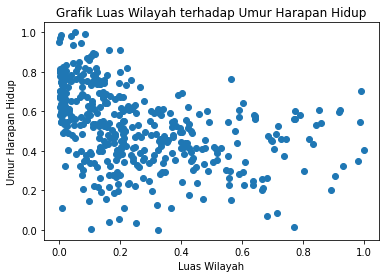

In [ ]:
# x axis values
x = scaled_df['luas_wilayah_km2']
# corresponding y axis values
y = scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Luas Wilayah')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Luas Wilayah terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

##QQ Plot After Scaling

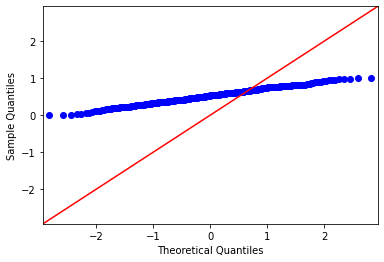

In [ ]:
sm.qqplot(scaled_df['umur_harapan_hidup'], line ='45')
py.show()

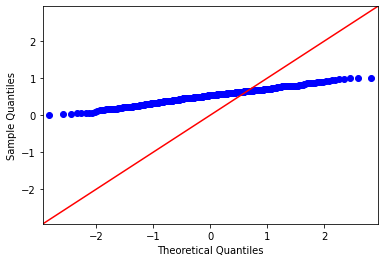

In [ ]:
sm.qqplot(scaled_df['persentase_keluhan_kesehatan'], line ='45')
py.show()

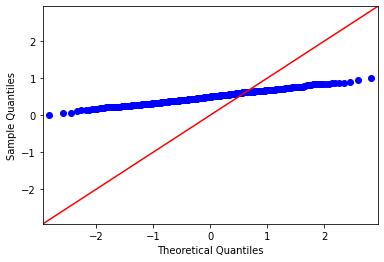

In [ ]:
sm.qqplot(scaled_df['persentase_menderita_sakit'], line ='45')
py.show()

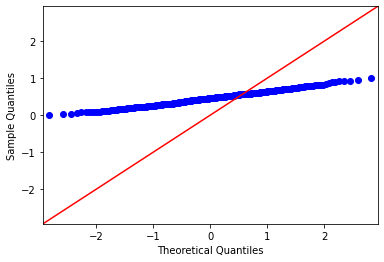

In [ ]:
sm.qqplot(scaled_df['persentase_berobat_jalan'], line ='45')
py.show()

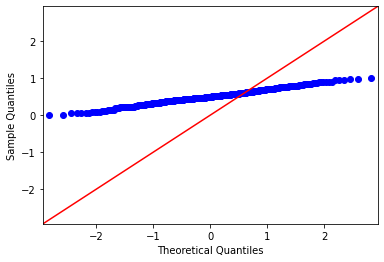

In [ ]:
sm.qqplot(scaled_df['persentase_rawat_inap'], line ='45')
py.show()

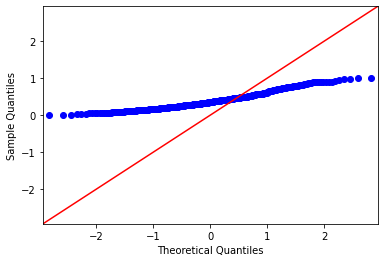

In [ ]:
sm.qqplot(scaled_df['persentase_jamkes_berobat_jalan'], line ='45')
py.show()

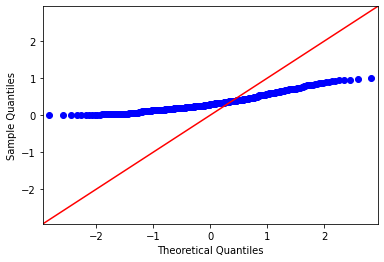

In [ ]:
sm.qqplot(scaled_df['fasilitas_kesehatan_per_kapita'], line ='45')
py.show()

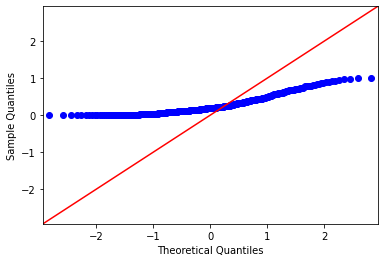

In [ ]:
sm.qqplot(scaled_df['luas_wilayah_km2'], line ='45')
py.show()

##Z-ING

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
scaler2 = StandardScaler()
names2 = scaled_df.columns
d2 = scaler2.fit_transform(scaled_df)
z_scaled_df = pd.DataFrame(d2, columns = names)

In [ ]:
z_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   umur_harapan_hidup               418 non-null    float64
 1   persentase_keluhan_kesehatan     418 non-null    float64
 2   persentase_menderita_sakit       418 non-null    float64
 3   persentase_berobat_jalan         418 non-null    float64
 4   persentase_rawat_inap            418 non-null    float64
 5   fasilitas_kesehatan_per_kapita   418 non-null    float64
 6   persentase_jamkes_berobat_jalan  418 non-null    float64
 7   luas_wilayah_km2                 418 non-null    float64
dtypes: float64(8)
memory usage: 26.2 KB


In [ ]:
z_scaled_df.describe()

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,fasilitas_kesehatan_per_kapita,persentase_jamkes_berobat_jalan,luas_wilayah_km2
count,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02
mean,-4.632127e-16,-4.674623e-17,4.568382e-17,-3.264268e-16,-1.556437e-16,7.968108e-19,1.290833e-16,1.976091e-16
std,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00
min,-2.635707e+00,-2.690561e+00,-2.899080e+00,-2.425092e+00,-2.630459e+00,-1.497618e+00,-1.732455e+00,-1.102925e+00
25%,-6.929595e-01,-6.593250e-01,-7.212477e-01,-7.663560e-01,-5.956990e-01,-7.139988e-01,-7.622970e-01,-7.606094e-01
50%,4.847551e-02,8.545045e-02,3.442601e-03,7.710771e-03,-4.050215e-02,-1.864312e-01,-1.380266e-01,-2.803659e-01
75%,6.858906e-01,6.560527e-01,7.638659e-01,6.661371e-01,6.473651e-01,5.335756e-01,5.432375e-01,5.075890e-01
max,2.422945e+00,2.474112e+00,2.928534e+00,2.934882e+00,2.635979e+00,3.039582e+00,2.762592e+00,3.211613e+00


##Independent vs Dependent Graph After Scaling & Z-ing

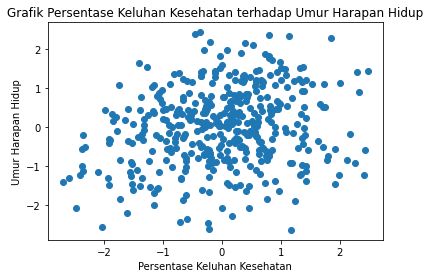

In [ ]:
# x axis values
x = z_scaled_df['persentase_keluhan_kesehatan']
# corresponding y axis values
y = z_scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Keluhan Kesehatan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Keluhan Kesehatan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

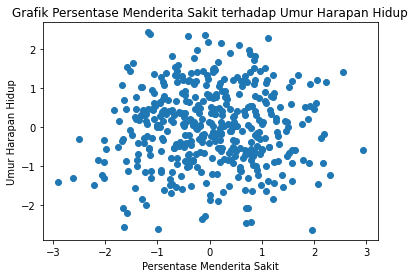

In [ ]:
# x axis values
x = z_scaled_df['persentase_menderita_sakit']
# corresponding y axis values
y = z_scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Menderita Sakit')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Menderita Sakit terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

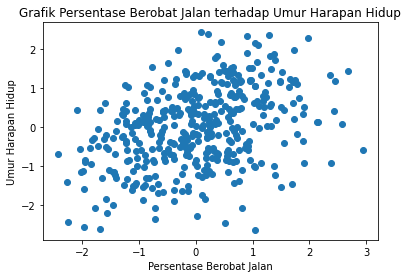

In [ ]:
# x axis values
x = z_scaled_df['persentase_berobat_jalan']
# corresponding y axis values
y = z_scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Berobat Jalan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Berobat Jalan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

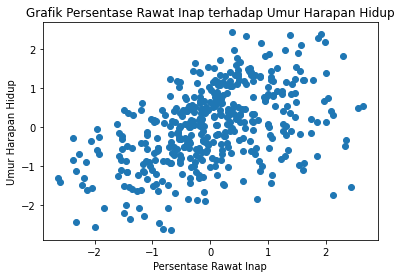

In [ ]:
# x axis values
x = z_scaled_df['persentase_rawat_inap']
# corresponding y axis values
y = z_scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase Rawat Inap')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase Rawat Inap terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

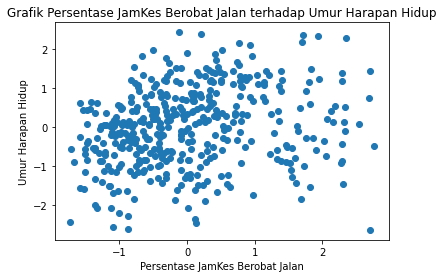

In [ ]:
# x axis values
x = z_scaled_df['persentase_jamkes_berobat_jalan']
# corresponding y axis values
y = z_scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Persentase JamKes Berobat Jalan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Persentase JamKes Berobat Jalan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

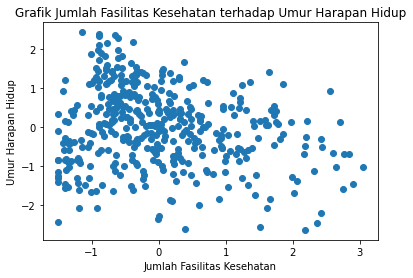

In [ ]:
# x axis values
x = z_scaled_df['fasilitas_kesehatan_per_kapita']
# corresponding y axis values
y = z_scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Jumlah Fasilitas Kesehatan')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Jumlah Fasilitas Kesehatan terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

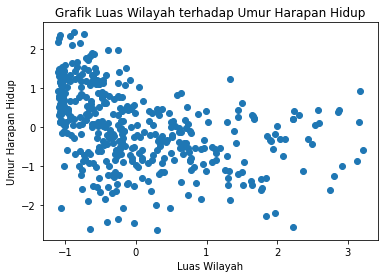

In [ ]:
# x axis values
x = z_scaled_df['luas_wilayah_km2']
# corresponding y axis values
y = z_scaled_df['umur_harapan_hidup']
 
# plotting the points
plt.scatter(x, y)
 
# naming the x axis
plt.xlabel('Luas Wilayah')
# naming the y axis
plt.ylabel('Umur Harapan Hidup')
 
# giving a title to my graph
plt.title('Grafik Luas Wilayah terhadap Umur Harapan Hidup')
 
# function to show the plot
plt.show()

##QQ Plot After Scaling & Z-ing

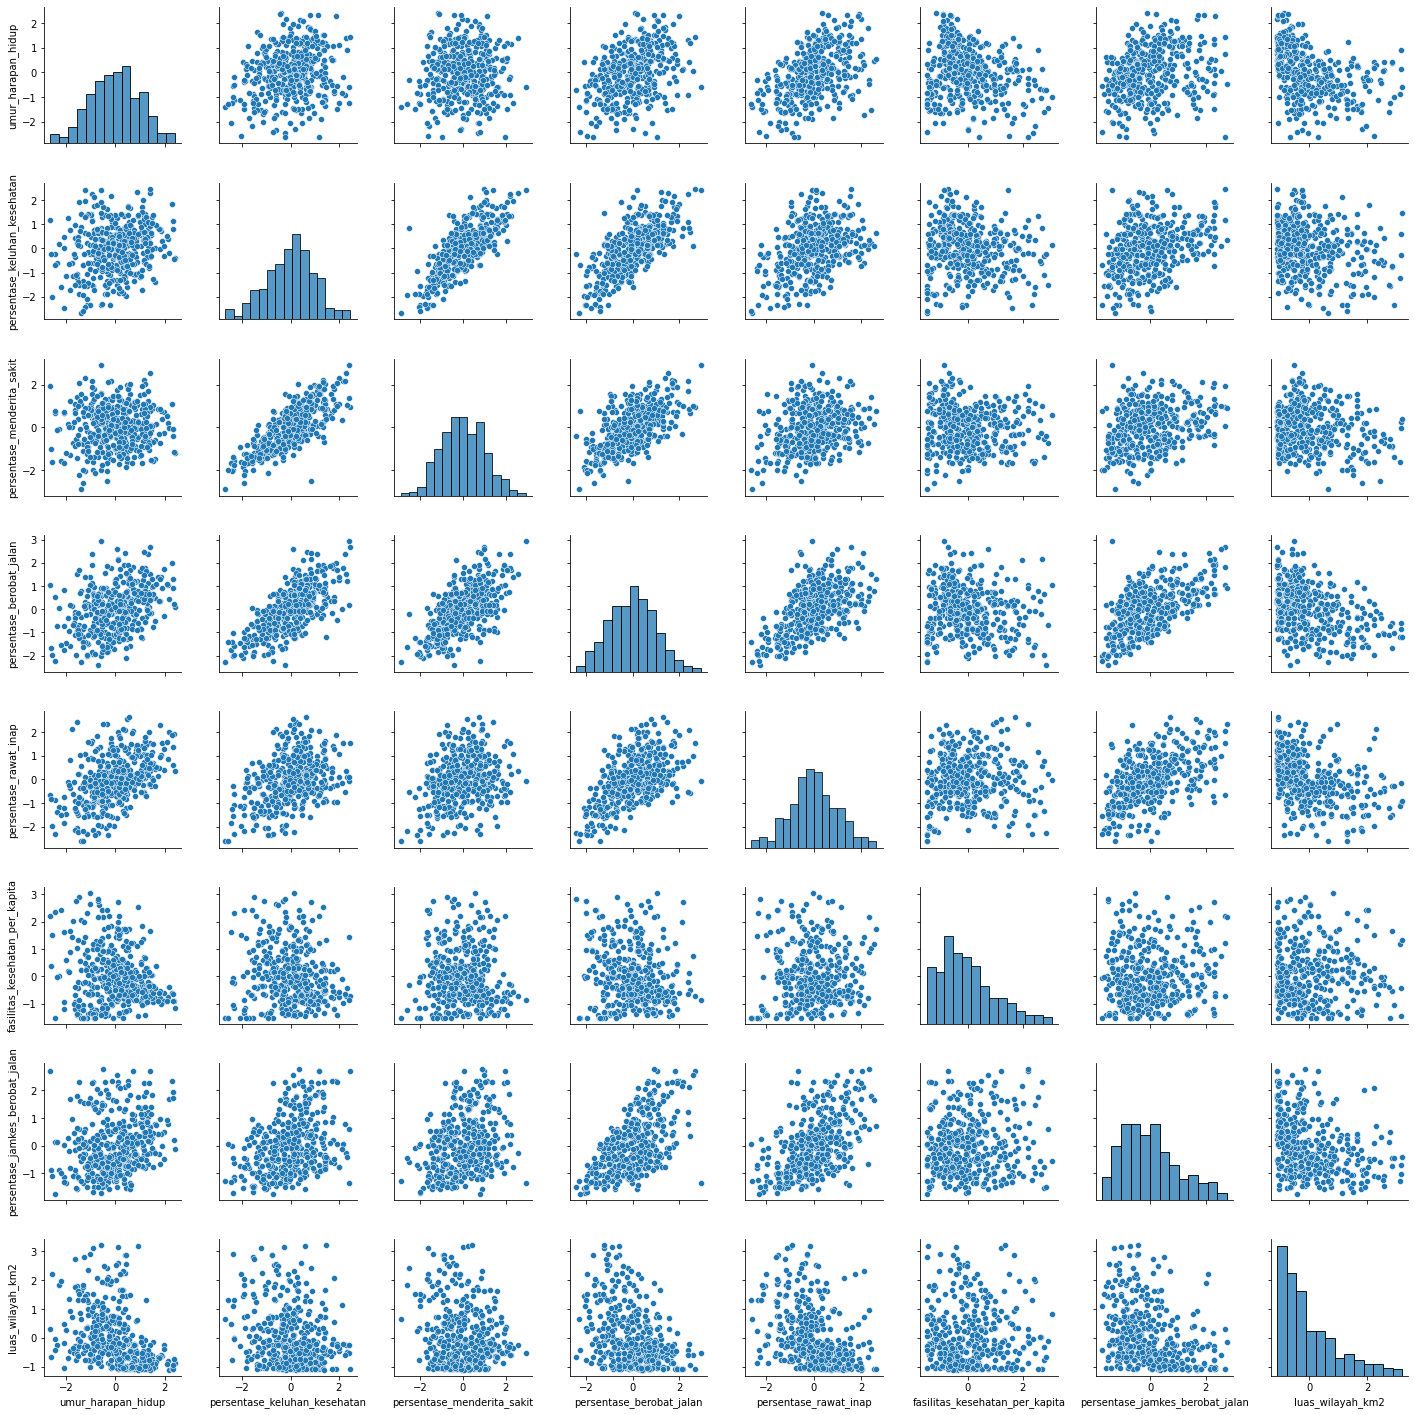

In [ ]:
sns.pairplot(z_scaled_df)

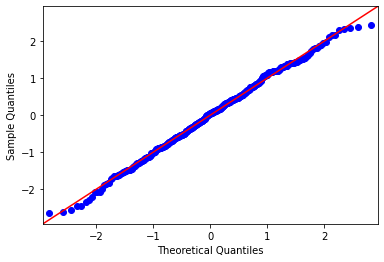

In [ ]:
sm.qqplot(z_scaled_df['umur_harapan_hidup'], line ='45')
py.show()

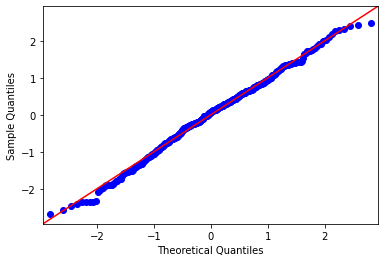

In [ ]:
sm.qqplot(z_scaled_df['persentase_keluhan_kesehatan'], line ='45')
py.show()

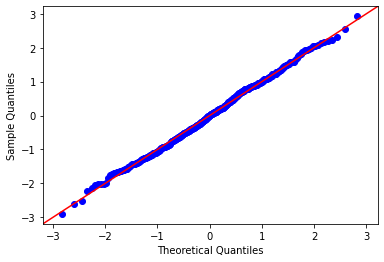

In [ ]:
sm.qqplot(z_scaled_df['persentase_menderita_sakit'], line ='45')
py.show()

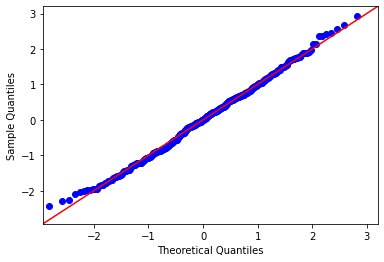

In [ ]:
sm.qqplot(z_scaled_df['persentase_berobat_jalan'], line ='45')
py.show()

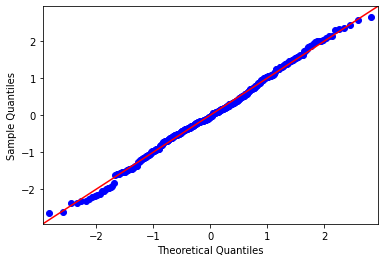

In [ ]:
sm.qqplot(z_scaled_df['persentase_rawat_inap'], line ='45')
py.show()

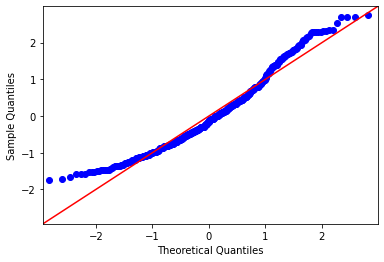

In [ ]:
sm.qqplot(z_scaled_df['persentase_jamkes_berobat_jalan'], line ='45')
py.show()

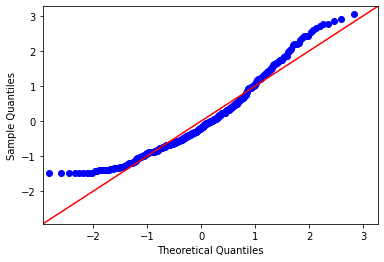

In [ ]:
sm.qqplot(z_scaled_df['fasilitas_kesehatan_per_kapita'], line ='45')
py.show()

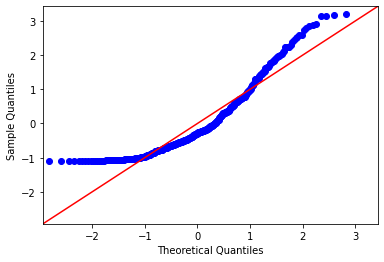

In [ ]:
sm.qqplot(z_scaled_df['luas_wilayah_km2'], line ='45')
py.show()

##UJI ASUMSI KLASIK

###Scaling

In [ ]:
#Normality test

from scipy.stats import anderson

result = anderson(scaled_df['umur_harapan_hidup'])
print ('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
  sig_lev, crit_val = result.significance_level[i], result.critical_values[i]
  if result.statistic < crit_val:
    print (f'Berdistribusi Normal : {crit_val} critical value at {sig_lev} level of significance')
  else:
    print (f'Tidak berdistribusi Normal : {crit_val} critical value at {sig_lev} level of significance')

#Tidak bisa membedakan normal/exponential

stat=0.285
Berdistribusi Normal : 0.571 critical value at 15.0 level of significance
Berdistribusi Normal : 0.65 critical value at 10.0 level of significance
Berdistribusi Normal : 0.78 critical value at 5.0 level of significance
Berdistribusi Normal : 0.909 critical value at 2.5 level of significance
Berdistribusi Normal : 1.082 critical value at 1.0 level of significance


In [ ]:
#Normality test

from scipy.stats import kstest

stat, p = kstest(scaled_df['umur_harapan_hidup'],'norm')
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

#Paling cocok untuk regression, bisa untuk >100

stat=0.534, p=0.000

Tidak berdistribusi Normal


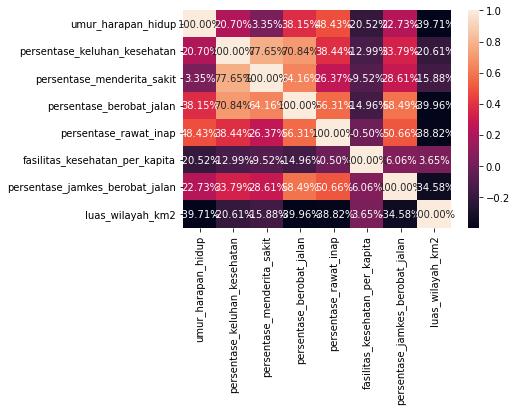

In [ ]:
#Linearity test
corr = scaled_df.corr()
hmcorr = sns.heatmap(corr, annot=True, fmt='.2%')
hmcorr
plt.show()

In [ ]:
#Multicollinearity test
features = ['persentase_keluhan_kesehatan','persentase_menderita_sakit','persentase_berobat_jalan','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita','luas_wilayah_km2']

X = scaled_df[features]
from statsmodels.stats.outliers_influence import variance_inflation_factor

model_variables = X.columns
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = pd.DataFrame({'Variable': model_variables, 'VIF': vif_values})
vif
vif.sort_values('VIF', ascending=False).reset_index(drop=True)

,Variable,VIF
0,persentase_keluhan_kesehatan,26.024522
1,persentase_menderita_sakit,23.844758
2,persentase_berobat_jalan,23.636043
3,persentase_rawat_inap,10.912842
4,persentase_jamkes_berobat_jalan,6.892259
5,fasilitas_kesehatan_per_kapita,3.012606
6,luas_wilayah_km2,2.072401


In [ ]:
#Multicollinearity test 2
features = ['persentase_menderita_sakit','persentase_berobat_jalan','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita','luas_wilayah_km2']

X = scaled_df[features]
from statsmodels.stats.outliers_influence import variance_inflation_factor

model_variables = X.columns
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = pd.DataFrame({'Variable': model_variables, 'VIF': vif_values})
vif
vif.sort_values('VIF', ascending=False).reset_index(drop=True)

,Variable,VIF
0,persentase_berobat_jalan,20.860164
1,persentase_menderita_sakit,14.562643
2,persentase_rawat_inap,10.683746
3,persentase_jamkes_berobat_jalan,6.858303
4,fasilitas_kesehatan_per_kapita,3.010740
5,luas_wilayah_km2,2.054144


In [ ]:
#Multicollinearity test 3
features = ['persentase_menderita_sakit','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita','luas_wilayah_km2']

X = scaled_df[features]
from statsmodels.stats.outliers_influence import variance_inflation_factor

model_variables = X.columns
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = pd.DataFrame({'Variable': model_variables, 'VIF': vif_values})
vif
vif.sort_values('VIF', ascending=False).reset_index(drop=True)

,Variable,VIF
0,persentase_rawat_inap,8.867454
1,persentase_menderita_sakit,7.643488
2,persentase_jamkes_berobat_jalan,5.785422
3,fasilitas_kesehatan_per_kapita,2.914830
4,luas_wilayah_km2,1.992828


In [ ]:
#define response variable
y = scaled_df['umur_harapan_hidup']

#define predictor variables
x = scaled_df[['persentase_menderita_sakit','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita','luas_wilayah_km2']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Heteroscedasticity test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 34.19758809882239, 'Test Statistic p-value': 0.02481874500604094, 'F-Statistic': 1.7686760236837953, 'F-Test p-value': 0.022080803704193255}


###Scaling & Z-ing

In [ ]:
#Normality test

from scipy.stats import anderson

result = anderson(z_scaled_df['umur_harapan_hidup'])
print ('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
  sig_lev, crit_val = result.significance_level[i], result.critical_values[i]
  if result.statistic < crit_val:
    print (f'Berdistribusi Normal : {crit_val} critical value at {sig_lev} level of significance')
  else:
    print (f'Tidak berdistribusi Normal : {crit_val} critical value at {sig_lev} level of significance')

#Tidak bisa membedakan normal/exponential

stat=0.285
Berdistribusi Normal : 0.571 critical value at 15.0 level of significance
Berdistribusi Normal : 0.65 critical value at 10.0 level of significance
Berdistribusi Normal : 0.78 critical value at 5.0 level of significance
Berdistribusi Normal : 0.909 critical value at 2.5 level of significance
Berdistribusi Normal : 1.082 critical value at 1.0 level of significance


In [ ]:
#Normality test

from scipy.stats import kstest

stat, p = kstest(z_scaled_df['umur_harapan_hidup'],'norm')
print ('stat=%.3f, p=%.3f\n'%(stat,p))
if p>0.05:
  print ('Berdistribusi Normal')
else:
  print ('Tidak berdistribusi Normal')

#Paling cocok untuk regression, bisa untuk >100

stat=0.031, p=0.823

Berdistribusi Normal


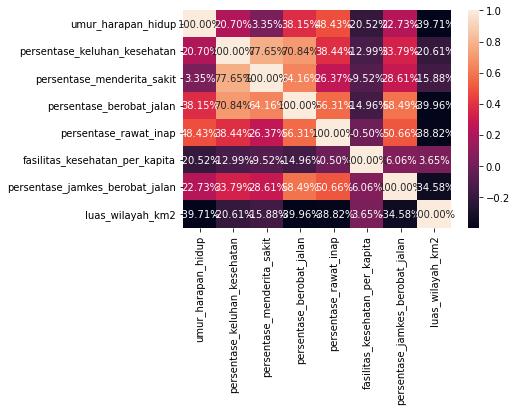

In [ ]:
#Linearity test
corr = z_scaled_df.corr()
hmcorr = sns.heatmap(corr, annot=True, fmt='.2%')
hmcorr
plt.show()

In [ ]:
#Multicollinearity test
features = ['persentase_keluhan_kesehatan','persentase_menderita_sakit','persentase_berobat_jalan','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita','luas_wilayah_km2']

X = z_scaled_df[features]
from statsmodels.stats.outliers_influence import variance_inflation_factor

model_variables = X.columns
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = pd.DataFrame({'Variable': model_variables, 'VIF': vif_values})
vif
vif.sort_values('VIF', ascending=False).reset_index(drop=True)

,Variable,VIF
0,persentase_berobat_jalan,3.453292
1,persentase_keluhan_kesehatan,3.164923
2,persentase_menderita_sakit,2.727987
3,persentase_jamkes_berobat_jalan,1.724074
4,persentase_rawat_inap,1.673171
5,luas_wilayah_km2,1.277362
6,fasilitas_kesehatan_per_kapita,1.064757


In [ ]:
#define response variable
y = z_scaled_df['umur_harapan_hidup']

#define predictor variables
x = z_scaled_df[['persentase_keluhan_kesehatan','persentase_menderita_sakit','persentase_berobat_jalan','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita','luas_wilayah_km2']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Heteroscedasticity test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 39.18324870985173, 'Test Statistic p-value': 0.2876086218839008, 'F-Statistic': 1.1289288823072192, 'F-Test p-value': 0.2870518512134466}


In [ ]:
import statsmodels.formula.api as smf

#fit regression model
fit = smf.ols('umur_harapan_hidup ~ persentase_keluhan_kesehatan+persentase_menderita_sakit+persentase_berobat_jalan+persentase_rawat_inap+persentase_jamkes_berobat_jalan+fasilitas_kesehatan_per_kapita+luas_wilayah_km2', data=z_scaled_df).fit()

#view model summary
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:     umur_harapan_hidup   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     36.06
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           3.28e-39
Time:                        15:54:37   Log-Likelihood:                -492.85
No. Observations:                 418   AIC:                             1002.
Df Residuals:                     410   BIC:                             1034.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(fit.resid, fit.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 10.033680740971546),
 ('p-value', 0.18667283194409812),
 ('f-value', 1.4405282668817434),
 ('f p-value', 0.18731880616732477)]

##ANALISIS REGRESI

###Scaling

In [ ]:
X = sm.add_constant(scaled_df[['persentase_menderita_sakit','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita','luas_wilayah_km2']].to_numpy())
y = scaled_df['umur_harapan_hidup'].to_numpy()
LR = sm.OLS(y, X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     42.77
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           1.80e-35
Time:                        15:52:03   Log-Likelihood:                 171.88
No. Observations:                 418   AIC:                            -331.8
Df Residuals:                     412   BIC:                            -307.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4961      0.037     13.370      0.0

In [ ]:
X = sm.add_constant(scaled_df[['persentase_menderita_sakit','persentase_rawat_inap','fasilitas_kesehatan_per_kapita','luas_wilayah_km2']].to_numpy())
y = scaled_df['umur_harapan_hidup'].to_numpy()
LR = sm.OLS(y, X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     53.44
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           2.79e-36
Time:                        15:52:03   Log-Likelihood:                 171.68
No. Observations:                 418   AIC:                            -333.4
Df Residuals:                     413   BIC:                            -313.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4945      0.037     13.368      0.0

###Scaling & Z-ing

In [ ]:
X = sm.add_constant(z_scaled_df[['persentase_keluhan_kesehatan','persentase_menderita_sakit','persentase_berobat_jalan','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita','luas_wilayah_km2']].to_numpy())
y = z_scaled_df['umur_harapan_hidup'].to_numpy()
LR = sm.OLS(y, X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     36.06
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           3.28e-39
Time:                        15:52:03   Log-Likelihood:                -492.85
No. Observations:                 418   AIC:                             1002.
Df Residuals:                     410   BIC:                             1034.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.132e-16      0.039  -1.58e-14      1.0

In [ ]:
X = sm.add_constant(z_scaled_df[['persentase_menderita_sakit','persentase_berobat_jalan','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita','luas_wilayah_km2']].to_numpy())
y = z_scaled_df['umur_harapan_hidup'].to_numpy()
LR = sm.OLS(y, X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     41.44
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           1.84e-39
Time:                        15:52:03   Log-Likelihood:                -494.23
No. Observations:                 418   AIC:                             1002.
Df Residuals:                     411   BIC:                             1031.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.132e-16      0.039  -1.58e-14      1.0

In [ ]:
#define response variable
y = z_scaled_df['umur_harapan_hidup']

#define predictor variables
x = z_scaled_df[['persentase_menderita_sakit','persentase_berobat_jalan','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita','luas_wilayah_km2']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Heteroscedasticity test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 34.82286977271503, 'Test Statistic p-value': 0.1434098766244199, 'F-Statistic': 1.3127010151408278, 'F-Test p-value': 0.1389501158663966}


In [ ]:
import statsmodels.formula.api as smf

#fit regression model
fit = smf.ols('umur_harapan_hidup ~ persentase_menderita_sakit+persentase_berobat_jalan+persentase_rawat_inap+persentase_jamkes_berobat_jalan+fasilitas_kesehatan_per_kapita+luas_wilayah_km2', data=z_scaled_df).fit()

#view model summary
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:     umur_harapan_hidup   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     41.44
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           1.84e-39
Time:                        15:57:53   Log-Likelihood:                -494.23
No. Observations:                 418   AIC:                             1002.
Df Residuals:                     411   BIC:                             1031.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(fit.resid, fit.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 9.622425499644109),
 ('p-value', 0.14147964615429234),
 ('f-value', 1.6140360976776553),
 ('f p-value', 0.141674138344209)]

In [137]:
#Multicollinearity test
features = ['persentase_menderita_sakit','persentase_berobat_jalan','persentase_rawat_inap','persentase_jamkes_berobat_jalan','fasilitas_kesehatan_per_kapita','luas_wilayah_km2']

X = z_scaled_df[features]
from statsmodels.stats.outliers_influence import variance_inflation_factor

model_variables = X.columns
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = pd.DataFrame({'Variable': model_variables, 'VIF': vif_values})
vif
vif.sort_values('VIF', ascending=False).reset_index(drop=True)

,Variable,VIF
0,persentase_berobat_jalan,3.058299
1,persentase_menderita_sakit,1.781362
2,persentase_jamkes_berobat_jalan,1.715273
3,persentase_rawat_inap,1.651932
4,luas_wilayah_km2,1.273185
5,fasilitas_kesehatan_per_kapita,1.063128
